In [1]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set_theme()

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
from src.utils import get_config, read_file

In [4]:
config = get_config.read_yaml()
symbols = config['data']['symbols']
symbols

['ETH/USDT',
 'BTC/USDT',
 'BNB/USDT',
 'SOL/USDT',
 'ADA/USDT',
 'AVAX/USDT',
 'LINK/USDT',
 'MATIC/USDT',
 'LTC/USDT',
 'UNI/USDT']

In [5]:
symbol = symbols[0]
symbol

'ETH/USDT'

In [6]:
data = read_file.read_training_data(symbol)
data

Reading Raw Equity data: ETH !
Successfully read: ETH !


,open,high,low,close,volume
timestamp,,,,,
2020-07-01 00:00:00,225.59,226.00,224.16,225.44,65497.22434
2020-07-01 04:00:00,225.45,226.35,224.80,225.58,54059.28230
2020-07-01 08:00:00,225.58,228.91,225.56,227.66,100051.80130
2020-07-01 12:00:00,227.66,229.42,226.80,229.42,94187.61415
2020-07-01 16:00:00,229.42,232.71,228.70,231.10,140283.09676
...,...,...,...,...,...
2024-06-29 04:00:00,3386.06,3408.32,3381.56,3399.72,18952.95950
2024-06-29 08:00:00,3399.72,3406.05,3387.20,3400.45,15348.80600
2024-06-29 12:00:00,3400.45,3403.20,3383.00,3394.62,12952.05660


In [7]:
# define a function to plot various datafields
def plot_df(df, kind=None):
    if kind is None:
        df.plot(figsize = (15,8), fontsize=12) # plots the graph with specified plot and font size
    else:
        df.plot(kind=kind, figsize = (15,8), fontsize=12, bins=100)
    plt.legend(fontsize = 12) # shows legends
    plt.show() # makes the plot visible

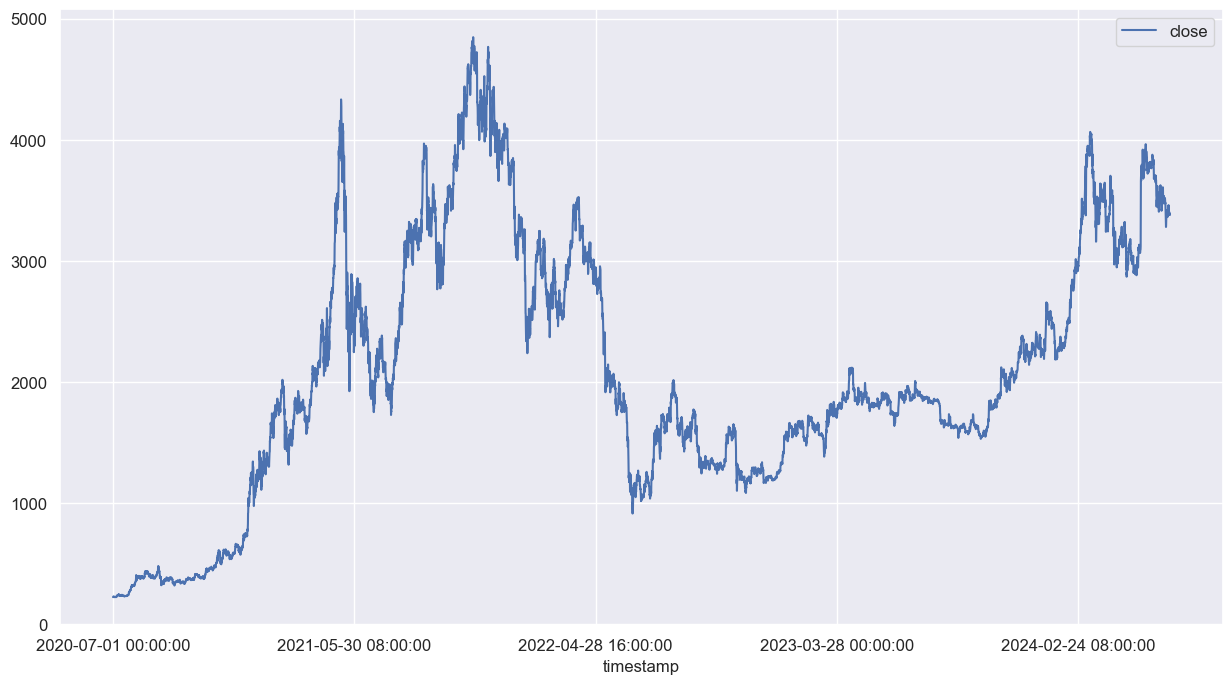

In [8]:
plot_df(data['close'])

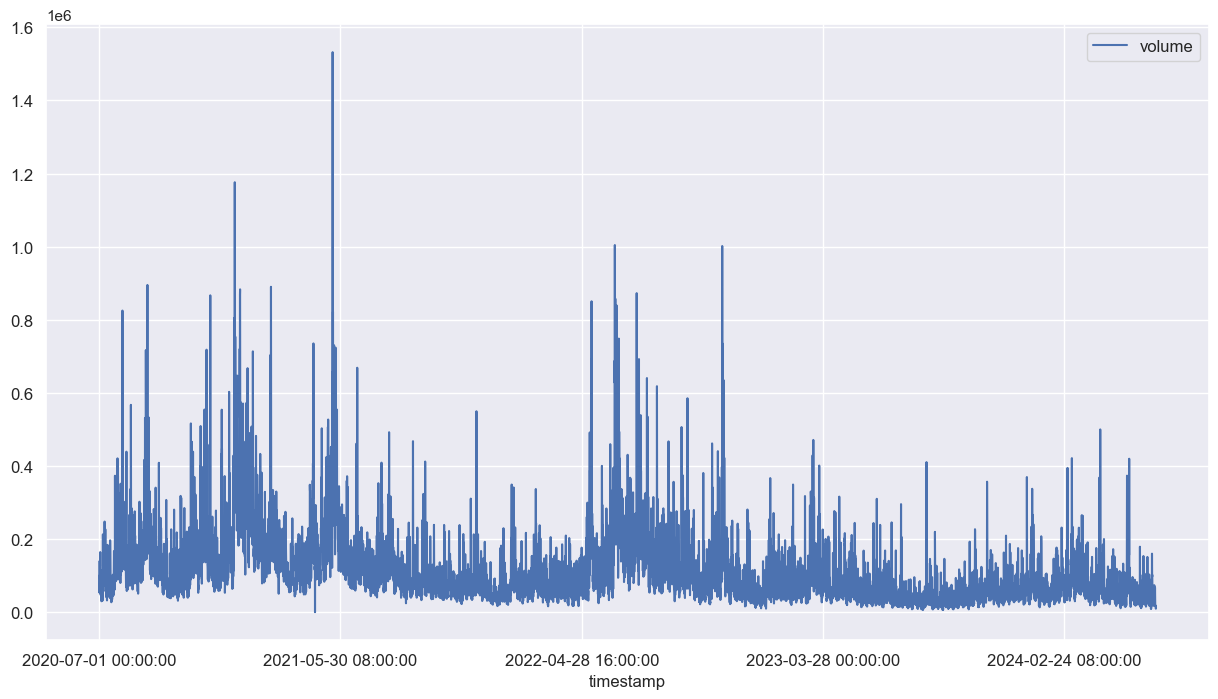

In [9]:
plot_df(data['volume'])